In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("7.csv")
data.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [3]:
print(data[data.isnull().any(axis=1)])

Empty DataFrame
Columns: [species, length, weight, w_l_ratio]
Index: []


In [4]:
data["wl-ratio"] = data.iloc[:, 2] / data.iloc[:, 1]

In [5]:
data.head()

,species,length,weight,w_l_ratio,wl-ratio
0,Anabas testudineus,10.66,3.45,0.32,0.323640
1,Anabas testudineus,6.91,3.27,0.47,0.473227
2,Anabas testudineus,8.38,3.46,0.41,0.412888
3,Anabas testudineus,7.57,3.36,0.44,0.443857
4,Anabas testudineus,10.83,3.38,0.31,0.312096


In [6]:
corr = data.iloc[:, 3].corr(data.iloc[:, 4], method="pearson")
print(corr)

0.999722110294869


In [7]:
# Such a high ratio, so column[3] is obviously dependent on column[1] and column[2]

In [8]:
data["col0_encoded"] = data.iloc[:, 0].astype("category").cat.codes + 1

In [9]:
data.head()

,species,length,weight,w_l_ratio,wl-ratio,col0_encoded
0,Anabas testudineus,10.66,3.45,0.32,0.323640,1
1,Anabas testudineus,6.91,3.27,0.47,0.473227,1
2,Anabas testudineus,8.38,3.46,0.41,0.412888,1
3,Anabas testudineus,7.57,3.36,0.44,0.443857,1
4,Anabas testudineus,10.83,3.38,0.31,0.312096,1


In [10]:
data.head(500)

,species,length,weight,w_l_ratio,wl-ratio,col0_encoded
0,Anabas testudineus,10.66,3.45,0.32,0.323640,1
1,Anabas testudineus,6.91,3.27,0.47,0.473227,1
2,Anabas testudineus,8.38,3.46,0.41,0.412888,1
3,Anabas testudineus,7.57,3.36,0.44,0.443857,1
4,Anabas testudineus,10.83,3.38,0.31,0.312096,1
...,...,...,...,...,...,...
495,Coilia dussumieri,23.62,2.54,0.11,0.107536,2
496,Coilia dussumieri,25.08,2.53,0.10,0.100877,2
497,Coilia dussumieri,24.54,2.66,0.11,0.108394,2
498,Coilia dussumieri,24.21,2.86,0.12,0.118133,2


In [11]:
data.tail()

,species,length,weight,w_l_ratio,wl-ratio,col0_encoded
4075,Sillaginopsis panijus,30.56,6.12,0.20,0.200262,9
4076,Sillaginopsis panijus,29.66,6.11,0.21,0.206001,9
4077,Sillaginopsis panijus,32.81,6.25,0.19,0.190491,9
4078,Sillaginopsis panijus,29.78,6.11,0.21,0.205171,9
4079,Sillaginopsis panijus,31.62,6.14,0.19,0.194181,9


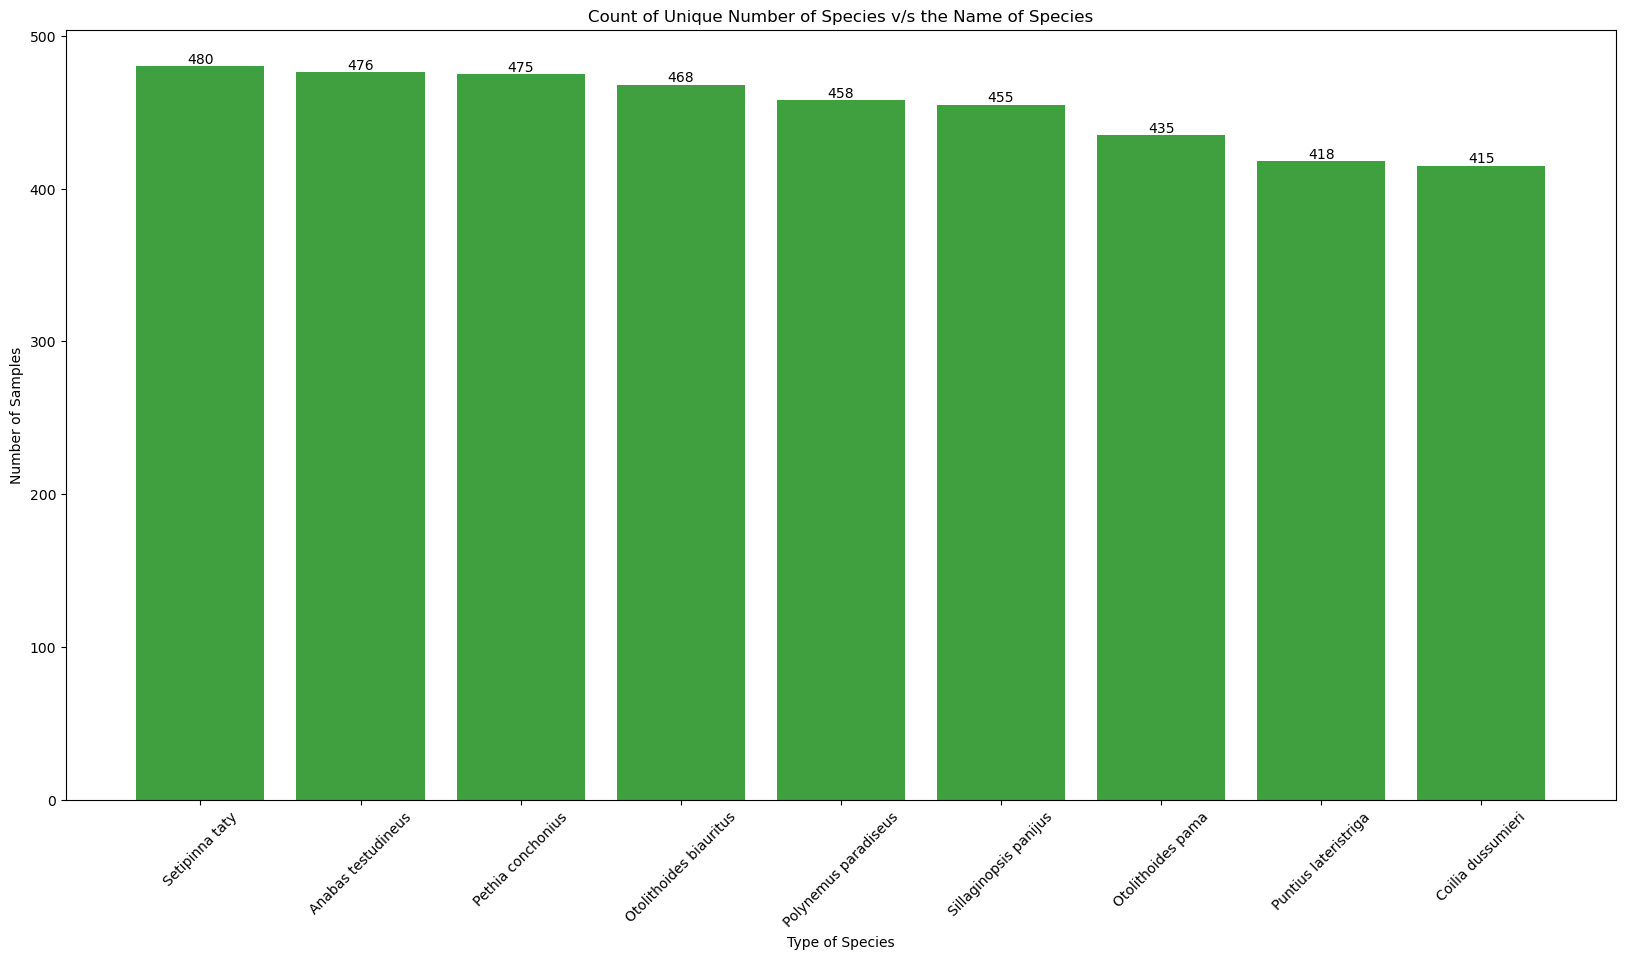

In [14]:
# Bar graph for number of species and name of species
counts = data.iloc[:, 0].value_counts()
encoded_labels = data[["col0_encoded", data.columns[0]]].drop_duplicates().set_index(data.columns[0])

plt.figure(figsize=(20, 10))
bars = plt.bar(counts.index, counts.values, color="green", alpha=0.75)

plt.xlabel("Type of Species")
plt.ylabel("Number of Samples")
plt.title("Count of Unique Number of Species v/s the Name of Species")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f"{int(bar.get_height())}", ha="center", va="bottom")

plt.xticks(rotation=45)
plt.savefig("bar_count_vs_species.png", dpi=800, bbox_inches="tight")
plt.show()

In [15]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

train_data, temp_data = train_test_split(data, test_size=0.3, stratify=data.iloc[:, -1], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data.iloc[:, -1], random_state=42)

In [16]:
print(test_data.iloc[:, -1].value_counts().to_frame(name="Count"))

              Count
col0_encoded       
8                72
5                72
1                71
3                70
6                69
9                68
4                65
7                63
2                62


In [17]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)

In [18]:
train_data.head()

,species,length,weight,w_l_ratio,wl-ratio,col0_encoded
0,Otolithoides pama,22.93,3.87,0.17,0.168775,4
1,Anabas testudineus,7.23,3.31,0.46,0.457815,1
2,Sillaginopsis panijus,30.16,6.09,0.20,0.201923,9
3,Sillaginopsis panijus,31.97,6.18,0.19,0.193306,9
4,Polynemus paradiseus,13.17,4.02,0.31,0.305239,6


In [19]:
from sklearn.linear_model import LogisticRegression

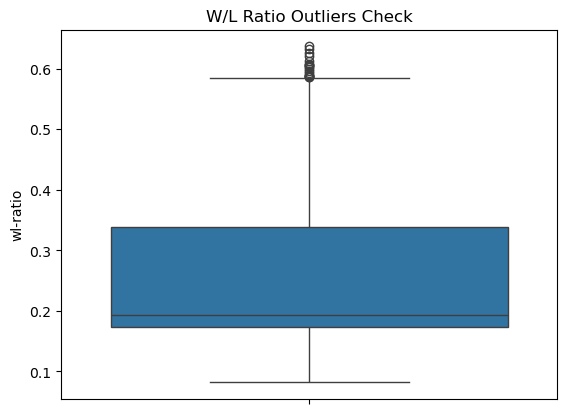

Validation Accuracy using Precomputed W/L Ratio (Scaled): 0.5605
[[0.16877453]
 [0.45781466]
 [0.20192308]
 ...
 [0.2040201 ]
 [0.21864407]
 [0.11400926]]


In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 🛠 Function to recompute W/L ratio
def compute_wl_ratio(df):
    return (df.iloc[:, 2] / df.iloc[:, 1]).values.reshape(-1, 1)  # Weight / Length

# 🟢 1️⃣ Check for Outliers in Precomputed W/L Ratio
sns.boxplot(train_data.iloc[:, -2])  # Boxplot for W/L Ratio
plt.title("W/L Ratio Outliers Check")
plt.show()

# 🟢 2️⃣ Using Precomputed W/L Ratio (with Scaling)
X_train, y_train = train_data.iloc[:, -2].values.reshape(-1, 1), train_data.iloc[:, -1]
X_val, y_val = val_data.iloc[:, -2].values.reshape(-1, 1), val_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, -2].values.reshape(-1, 1), test_data.iloc[:, -1]

# Scale W/L Ratio
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Logistic Regression
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy using Precomputed W/L Ratio (Scaled): {accuracy:.4f}")

print(X_train)

In [64]:

# 🟢 4️⃣ Using Length & Weight as Features (Baseline)
X_train, y_train = train_data.iloc[:, [1, 2]], train_data.iloc[:, -1]
X_val, y_val = val_data.iloc[:, [1, 2]], val_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, [1, 2]], test_data.iloc[:, -1]

# Scale Length & Weight
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Logistic Regression
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy using Length & Weight: {accuracy:.4f}")
print(X_train)

Validation Accuracy using Length & Weight: 0.9085
      length  weight
0      22.93    3.87
1       7.23    3.31
2      30.16    6.09
3      31.97    6.18
4      13.17    4.02
...      ...     ...
2851    6.91    3.17
2852   17.71    3.09
2853   29.85    6.09
2854   11.80    2.58
2855   23.77    2.71

[2856 rows x 2 columns]


In [59]:
X_train = np.column_stack((train_data.iloc[:, 1], train_data.iloc[:, 2], compute_wl_ratio(train_data)))
X_val = np.column_stack((val_data.iloc[:, 1], val_data.iloc[:, 2], compute_wl_ratio(val_data)))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, train_data.iloc[:, -1])
y_pred = model.predict(X_val_scaled)

accuracy = accuracy_score(val_data.iloc[:, -1], y_pred)
print(f"Validation Accuracy using Length, Weight & W/L Ratio: {accuracy:.4f}")

Validation Accuracy using Length, Weight & W/L Ratio: 0.9069


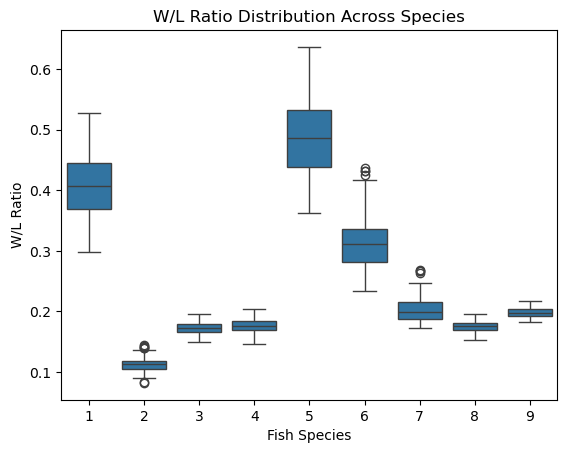

In [60]:
import seaborn as sns
sns.boxplot(x=train_data.iloc[:, -1], y=compute_wl_ratio(train_data).ravel())
plt.xlabel("Fish Species")
plt.ylabel("W/L Ratio")
plt.title("W/L Ratio Distribution Across Species")
plt.show()

In [54]:
# Selecting Length and Weight as features
X_train, y_train = train_data.iloc[:, [1, 2]], train_data.iloc[:, -1]
X_val, y_val = val_data.iloc[:, [1, 2]], val_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, [1, 2]], test_data.iloc[:, -1]

# Train Logistic Regression Model
model = LogisticRegression(max_iter=100000, random_state=42)
model.fit(X_train, y_train)

# Evaluate on validation set
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Validation Accuracy using Length & Weight: {accuracy:.4f}")

Validation Accuracy using Length & Weight: 0.8987


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on validation set
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Validation Accuracy using Random Forest: {accuracy:.4f}")

Validation Accuracy using Random Forest: 0.9314


In [23]:
from sklearn.svm import SVC

# Train SVM with RBF Kernel
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate on validation set
y_pred = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Validation Accuracy using SVM (RBF Kernel): {accuracy:.4f}")

Validation Accuracy using SVM (RBF Kernel): 0.8464


In [24]:
from xgboost import XGBClassifier

# Adjust labels to start from 0
y_train_adj = y_train - 1
y_val_adj = y_val - 1

# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train_adj)

# Evaluate on validation set
y_pred = xgb_model.predict(X_val)
accuracy = accuracy_score(y_val_adj, y_pred)

print(f"Validation Accuracy using XGBoost: {accuracy:.4f}")

Validation Accuracy using XGBoost: 0.9150


In [25]:
# Neural network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Adjust labels to start from 0
y_train_adj = y_train - 1
y_val_adj = y_val - 1

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_adj.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_adj.values, dtype=torch.long)

# Create DataLoaders
batch_size = 8
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define Neural Network Model
class FishClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FishClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Initialize model
input_size = X_train.shape[1]
num_classes = len(y_train.unique())
model = FishClassifier(input_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Evaluate on validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    val_accuracy = correct / total
    print(f"Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_accuracy:.4f}")

print(f"Final Validation Accuracy using Neural Network: {val_accuracy:.4f}")


Epoch 1/50, Validation Accuracy: 0.4248
Epoch 2/50, Validation Accuracy: 0.5245
Epoch 3/50, Validation Accuracy: 0.6977
Epoch 4/50, Validation Accuracy: 0.7141
Epoch 5/50, Validation Accuracy: 0.7075
Epoch 6/50, Validation Accuracy: 0.7500
Epoch 7/50, Validation Accuracy: 0.7565
Epoch 8/50, Validation Accuracy: 0.7386
Epoch 9/50, Validation Accuracy: 0.7092
Epoch 10/50, Validation Accuracy: 0.7451
Epoch 11/50, Validation Accuracy: 0.7320
Epoch 12/50, Validation Accuracy: 0.7859
Epoch 13/50, Validation Accuracy: 0.7533
Epoch 14/50, Validation Accuracy: 0.7484
Epoch 15/50, Validation Accuracy: 0.7696
Epoch 16/50, Validation Accuracy: 0.7843
Epoch 17/50, Validation Accuracy: 0.7516
Epoch 18/50, Validation Accuracy: 0.7484
Epoch 19/50, Validation Accuracy: 0.7680
Epoch 20/50, Validation Accuracy: 0.8039
Epoch 21/50, Validation Accuracy: 0.8023
Epoch 22/50, Validation Accuracy: 0.7827
Epoch 23/50, Validation Accuracy: 0.7614
Epoch 24/50, Validation Accuracy: 0.7729
Epoch 25/50, Validation A

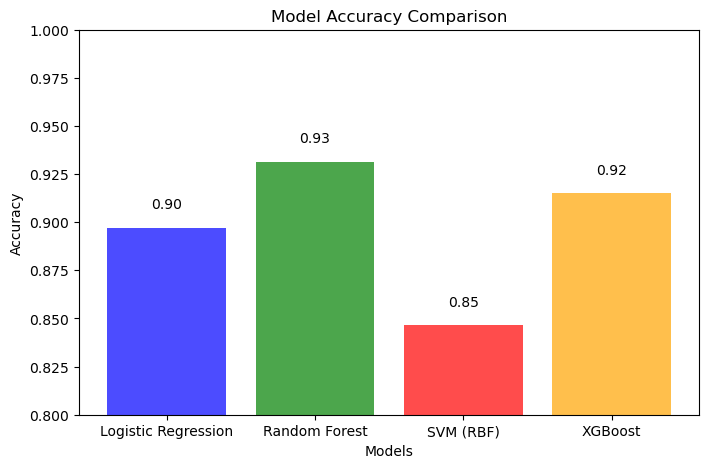

In [26]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ["Logistic Regression", "Random Forest", "SVM (RBF)", "XGBoost"]
accuracies = [0.8971, 0.9314, 0.8464, 0.915]  # Replace with your exact results

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=["blue", "green", "red", "orange"], alpha=0.7)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1)  # Adjust based on accuracy range

# Display accuracy on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center")

plt.savefig("model_accuracy_comparison.png", dpi=300)
plt.show()


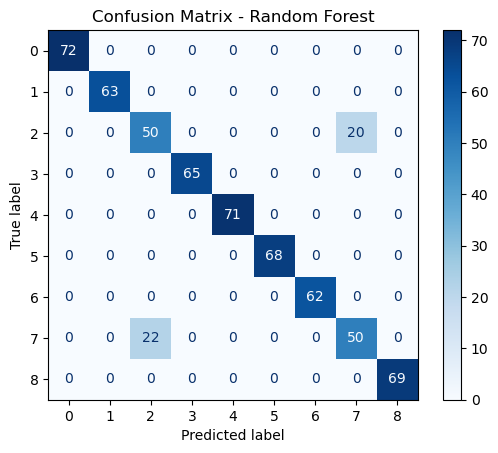

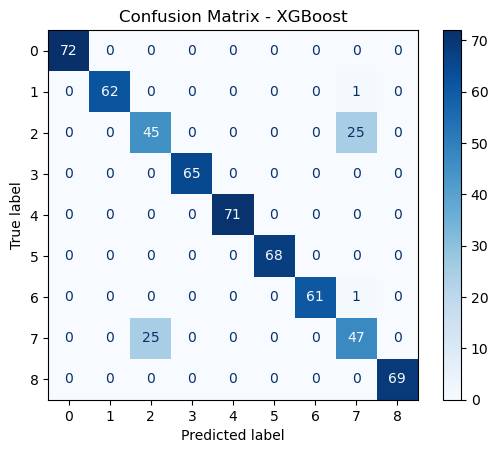

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.savefig(f"confusion_matrix_{model_name.lower().replace(' ', '_')}.png", dpi=300)
    plt.show()

# Get predictions
y_pred_rf = rf_model.predict(X_val)
y_pred_xgb = xgb_model.predict(X_val)

# Plot for Random Forest
plot_confusion_matrix(y_val, y_pred_rf, "Random Forest")

# Plot for XGBoost
plot_confusion_matrix(y_val_adj, y_pred_xgb, "XGBoost")


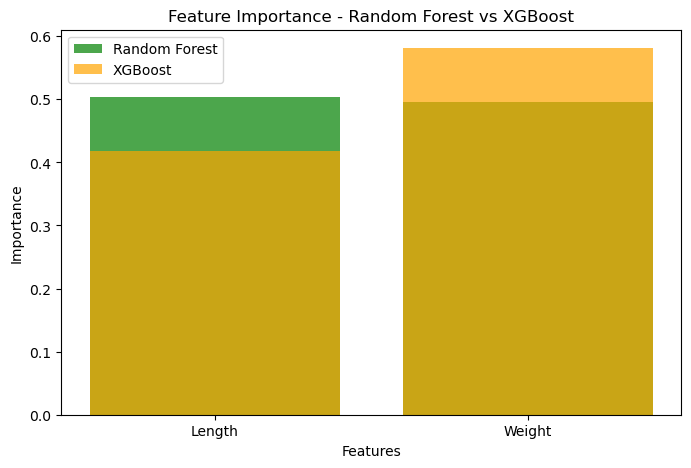

In [28]:
import numpy as np

# Get feature importance
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_
features = ["Length", "Weight"]

# Plot Feature Importance
plt.figure(figsize=(8, 5))
plt.bar(features, rf_importance, color="green", alpha=0.7, label="Random Forest")
plt.bar(features, xgb_importance, color="orange", alpha=0.7, label="XGBoost")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - Random Forest vs XGBoost")
plt.legend()
plt.savefig("feature_importance_comparison.png", dpi=300)
plt.show()


In [30]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Custom predict function for PyTorch model
def torch_predict(model, X):
    model.eval()
    X_tensor = torch.tensor(X, dtype=torch.float32)
    with torch.no_grad():
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs, 1)  # Get class index
    return predicted.numpy()

# Modified decision boundary plot function
def plot_decision_boundary(model, X, y, model_name, pytorch_model=False):
    h = 0.01  # Step size for mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Use custom predict function for PyTorch model
    if pytorch_model:
        Z = torch_predict(model, np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)

    # Plot Decision Boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FF9999", "#99CCFF", "#99FF99"]))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette="deep", edgecolor="k")
    plt.xlabel("Length")
    plt.ylabel("Weight")
    plt.title(f"Decision Boundary - {model_name}")
    plt.savefig(f"decision_boundary_{model_name.lower().replace(' ', '_')}.png", dpi=300)
    plt.show()


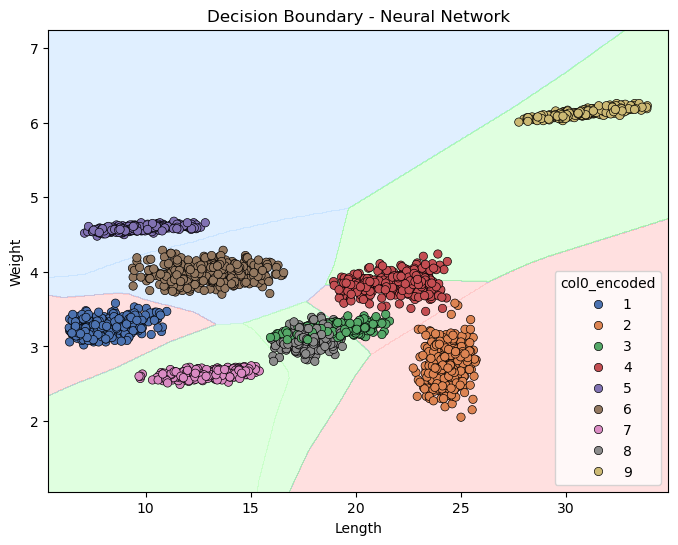

In [32]:
plot_decision_boundary(model, X_train, y_train, "Neural Network", pytorch_model=True)

/home/imangi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


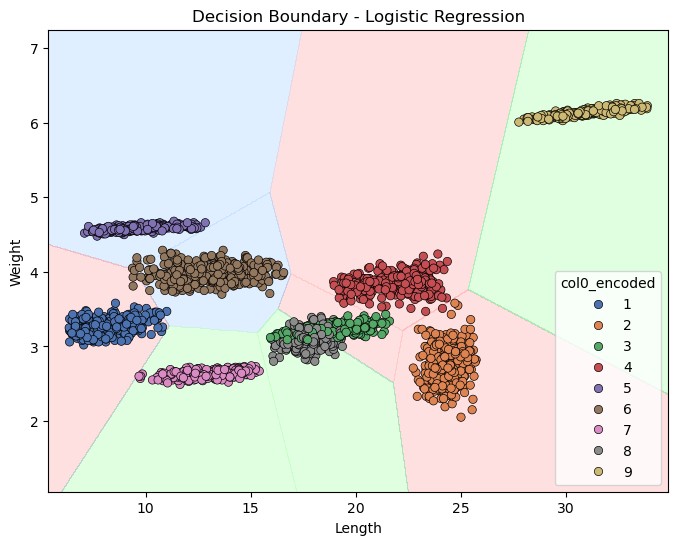

/home/imangi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


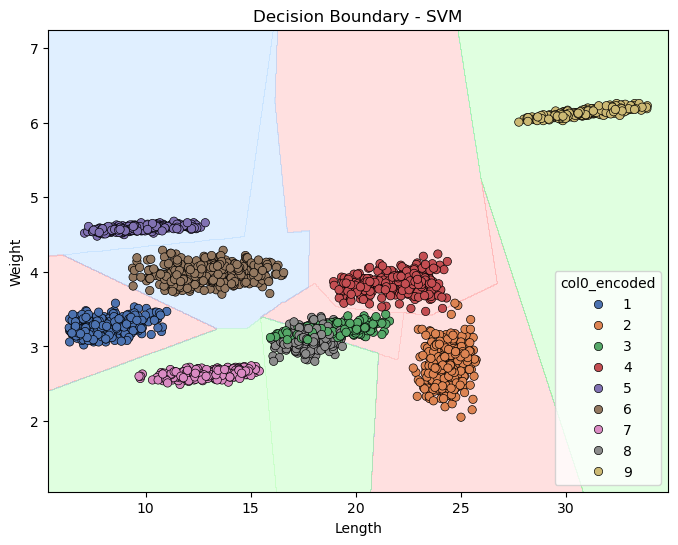

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Train the models
log_reg_model = LogisticRegression(max_iter=10000)
log_reg_model.fit(X_train, y_train)  # Fit Logistic Regression

svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)  # Fit SVM

# Now plot decision boundaries
plot_decision_boundary(log_reg_model, X_train, y_train, "Logistic Regression")
plot_decision_boundary(svm_model, X_train, y_train, "SVM")

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

log_reg_model = LogisticRegression(max_iter=1000, class_weight="balanced")
svm_model = SVC(kernel="linear")

log_reg_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score

y_pred_logreg = log_reg_model.predict(X_val_scaled)
y_pred_svm = svm_model.predict(X_val_scaled)

acc_logreg = accuracy_score(y_val, y_pred_logreg)
acc_svm = accuracy_score(y_val, y_pred_svm)

print(f"Logistic Regression Accuracy: {acc_logreg:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")

Logistic Regression Accuracy: 0.9150
SVM Accuracy: 0.9134


/home/imangi/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


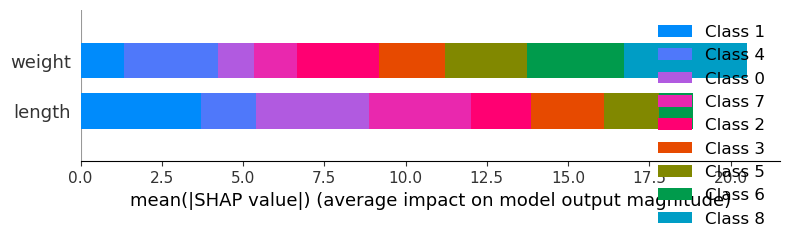

In [39]:
import shap

# Explain XGBoost Predictions
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train)

# Plot Summary
shap.summary_plot(shap_values, X_train, show=False)
plt.savefig("shap_summary_xgb.png", dpi=300)
plt.show()

In [40]:
from sklearn.metrics import classification_report

# Generate report
report = classification_report(y_val, y_pred_rf)
print(report)

# Save report to a text file
with open("classification_report_rf.txt", "w") as f:
    f.write(report)
print("📄 Classification report saved as 'classification_report_rf.txt'")


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        63
           3       0.69      0.71      0.70        70
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        71
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        62
           8       0.71      0.69      0.70        72
           9       1.00      1.00      1.00        69

    accuracy                           0.93       612
   macro avg       0.93      0.93      0.93       612
weighted avg       0.93      0.93      0.93       612

📄 Classification report saved as 'classification_report_rf.txt'


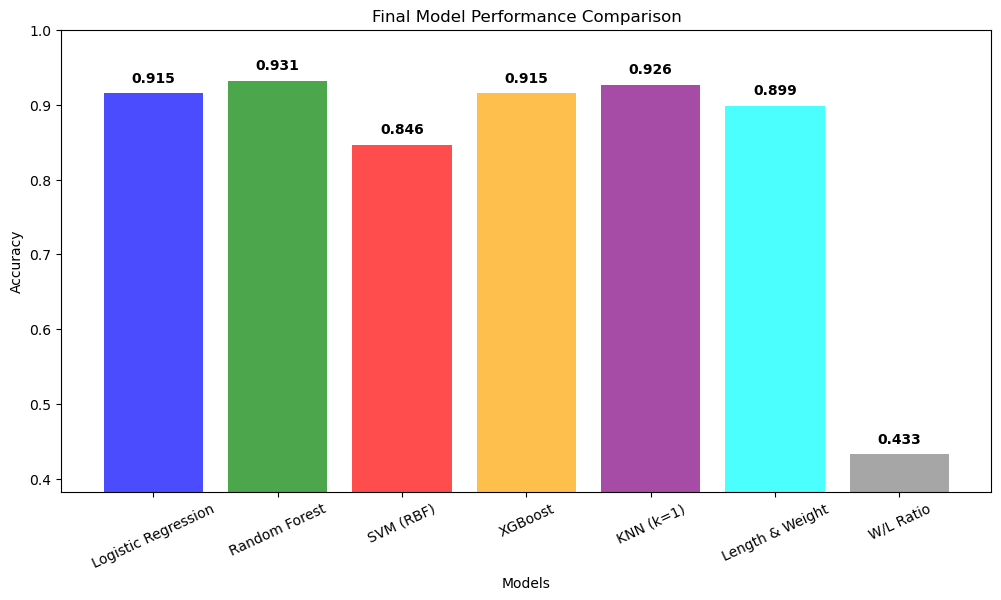

In [52]:
import matplotlib.pyplot as plt

# Model names & accuracies
models = ["Logistic Regression", "Random Forest", "SVM (RBF)", "XGBoost", "KNN (k=1)", "Length & Weight", "W/L Ratio"]
accuracies = [0.9150, 0.9314, 0.8464, 0.9150, 0.9265, 0.8987, 0.4330]
colors = ["blue", "green", "red", "orange", "purple", "cyan", "gray"]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=colors, alpha=0.7)

# Labels & title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Final Model Performance Comparison")
plt.ylim(min(accuracies) - 0.05, 1)  # Auto-adjusted for better visibility
plt.xticks(rotation=25)

# Add accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.015, f"{acc:.3f}", ha="center", fontsize=10, fontweight="bold")

# Save & Show
plt.savefig("final_summary_plot.png", dpi=300, bbox_inches="tight")
plt.show()


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define range of k values to test
k_values = list(range(1, 21, 2))  # Trying odd values from 1 to 19
accuracies = []

# Train KNN for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print(f"k = {k}: Accuracy = {acc:.4f}")

# Find the best k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"\n🔹 Best k found: {best_k} with accuracy {max(accuracies):.4f}")


k = 1: Accuracy = 0.9265
k = 3: Accuracy = 0.9265
k = 5: Accuracy = 0.9248
k = 7: Accuracy = 0.9265
k = 9: Accuracy = 0.9232
k = 11: Accuracy = 0.9167
k = 13: Accuracy = 0.9183
k = 15: Accuracy = 0.9069
k = 17: Accuracy = 0.9101
k = 19: Accuracy = 0.9052

🔹 Best k found: 1 with accuracy 0.9265


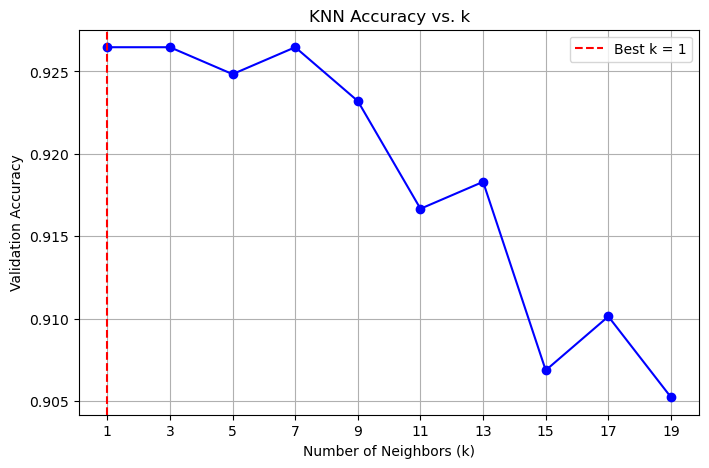

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("KNN Accuracy vs. k")
plt.xticks(k_values)
plt.grid()
plt.axvline(x=best_k, color='red', linestyle='--', label=f"Best k = {best_k}")
plt.legend()
plt.savefig("knn_best_k_plot.png", dpi=300)
plt.show()


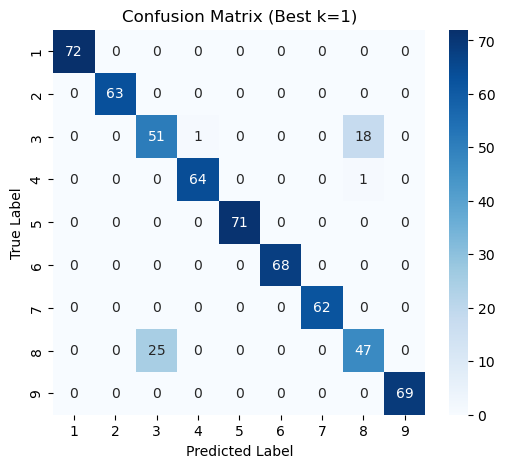

In [44]:
# Train and predict using best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_val)

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(1, 10), yticklabels=range(1, 10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Best k={best_k})")
plt.savefig("knn_confusion_matrix.png", dpi=300)
plt.show()


In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np 

# Convert data to tensors (Fixing label issue)
scaler = StandardScaler()
X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

# Convert labels to zero-indexed
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values - 1, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_scaled, y_train_tensor)
val_dataset = TensorDataset(X_val_scaled, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define Neural Network
class FishClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=32, num_classes=9):
        super(FishClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize Model
input_dim = X_train.shape[1]
model = FishClassifier(input_size=input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)  # No more out-of-bounds error
        loss.backward()
        optimizer.step()

    # Validation Accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {acc:.4f}")

# Save Model
torch.save(model.state_dict(), "fish_classifier.pth")


Epoch [1/50], Validation Accuracy: 0.7255
Epoch [2/50], Validation Accuracy: 0.9020
Epoch [3/50], Validation Accuracy: 0.9101
Epoch [4/50], Validation Accuracy: 0.8873
Epoch [5/50], Validation Accuracy: 0.9003
Epoch [6/50], Validation Accuracy: 0.8938
Epoch [7/50], Validation Accuracy: 0.9118
Epoch [8/50], Validation Accuracy: 0.9167
Epoch [9/50], Validation Accuracy: 0.9167
Epoch [10/50], Validation Accuracy: 0.9167
Epoch [11/50], Validation Accuracy: 0.9150
Epoch [12/50], Validation Accuracy: 0.9118
Epoch [13/50], Validation Accuracy: 0.9150
Epoch [14/50], Validation Accuracy: 0.9134
Epoch [15/50], Validation Accuracy: 0.9167
Epoch [16/50], Validation Accuracy: 0.9199
Epoch [17/50], Validation Accuracy: 0.9134
Epoch [18/50], Validation Accuracy: 0.9150
Epoch [19/50], Validation Accuracy: 0.9150
Epoch [20/50], Validation Accuracy: 0.9232
Epoch [21/50], Validation Accuracy: 0.9167
Epoch [22/50], Validation Accuracy: 0.9134
Epoch [23/50], Validation Accuracy: 0.9265
Epoch [24/50], Valid

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np 

# 🚀 Standardize the Data
scaler = StandardScaler()
X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

# 🎯 Convert Labels (Zero-indexed)
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values - 1, dtype=torch.long)

# 📦 Create DataLoader
train_dataset = TensorDataset(X_train_scaled, y_train_tensor)
val_dataset = TensorDataset(X_val_scaled, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 🧠 **Neural Network Model**
class FishClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_classes=9):
        super(FishClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch Norm 1
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)  # Batch Norm 2
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(p=0.3)  # Dropout for regularization

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))  # Layer 1
        x = self.dropout(x)  # Dropout
        x = F.relu(self.bn2(self.fc2(x)))  # Layer 2
        x = self.fc3(x)  # Output Layer
        return x

# 🎯 Initialize Model
input_dim = X_train.shape[1]
model = FishClassifier(input_size=input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Higher LR for quick start
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)  # Adjust LR over time

# 🚀 Training Loop
num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    scheduler.step()  # Adjust learning rate

    # 🎯 Validation Accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {acc:.4f}")

# 💾 Save Model
torch.save(model.state_dict(), "fish_classifier.pth")


Epoch [1/150], Validation Accuracy: 0.8742
Epoch [2/150], Validation Accuracy: 0.9020
Epoch [3/150], Validation Accuracy: 0.8497
Epoch [4/150], Validation Accuracy: 0.8775
Epoch [5/150], Validation Accuracy: 0.8840
Epoch [6/150], Validation Accuracy: 0.8824
Epoch [7/150], Validation Accuracy: 0.9069
Epoch [8/150], Validation Accuracy: 0.8971
Epoch [9/150], Validation Accuracy: 0.9297
Epoch [10/150], Validation Accuracy: 0.9118
Epoch [11/150], Validation Accuracy: 0.8905
Epoch [12/150], Validation Accuracy: 0.8873
Epoch [13/150], Validation Accuracy: 0.9101
Epoch [14/150], Validation Accuracy: 0.9085
Epoch [15/150], Validation Accuracy: 0.8742
Epoch [16/150], Validation Accuracy: 0.8938
Epoch [17/150], Validation Accuracy: 0.9150
Epoch [18/150], Validation Accuracy: 0.9036
Epoch [19/150], Validation Accuracy: 0.9085
Epoch [20/150], Validation Accuracy: 0.9085
Epoch [21/150], Validation Accuracy: 0.8954
Epoch [22/150], Validation Accuracy: 0.8954
Epoch [23/150], Validation Accuracy: 0.90

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np 

# 🚀 Standardize the Data
scaler = StandardScaler()
X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

# 🎯 Convert Labels (Zero-indexed)
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values - 1, dtype=torch.long)

# 📦 Create DataLoader
train_dataset = TensorDataset(X_train_scaled, y_train_tensor)
val_dataset = TensorDataset(X_val_scaled, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# 🧠 **Neural Network Model**
class FishClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=256, num_classes=9):
        super(FishClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc4 = nn.Linear(hidden_size // 2, num_classes)
        self.dropout = nn.Dropout(p=0.4)  

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# 🎯 Initialize Model
input_dim = X_train.shape[1]
model = FishClassifier(input_size=input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)  
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5)

# 🚀 Training Loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    scheduler.step()

    # 🎯 Validation Accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {acc:.4f}")

# 💾 Save Model
torch.save(model.state_dict(), "fish_classifier.pth")


Epoch [1/200], Validation Accuracy: 0.9069
Epoch [2/200], Validation Accuracy: 0.8840
Epoch [3/200], Validation Accuracy: 0.9069
Epoch [4/200], Validation Accuracy: 0.8905
Epoch [5/200], Validation Accuracy: 0.9052
Epoch [6/200], Validation Accuracy: 0.8824
Epoch [7/200], Validation Accuracy: 0.9020
Epoch [8/200], Validation Accuracy: 0.9134
Epoch [9/200], Validation Accuracy: 0.8856
Epoch [10/200], Validation Accuracy: 0.9069
Epoch [11/200], Validation Accuracy: 0.9085
Epoch [12/200], Validation Accuracy: 0.9232
Epoch [13/200], Validation Accuracy: 0.9020
Epoch [14/200], Validation Accuracy: 0.9118
Epoch [15/200], Validation Accuracy: 0.9036
Epoch [16/200], Validation Accuracy: 0.9036
Epoch [17/200], Validation Accuracy: 0.9150
Epoch [18/200], Validation Accuracy: 0.9052
Epoch [19/200], Validation Accuracy: 0.9036
Epoch [20/200], Validation Accuracy: 0.9183
Epoch [21/200], Validation Accuracy: 0.9150
Epoch [22/200], Validation Accuracy: 0.9150
Epoch [23/200], Validation Accuracy: 0.89

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🔹 Step 1: Preprocess Data (Scaling & Tensor Conversion)
scaler = StandardScaler()
X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

# 💡 FIX: Convert labels to zero-indexed (Subtract 1 for PyTorch)
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values - 1, dtype=torch.long)

# 🔹 Step 2: Define Neural Network Model
class FishClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_classes=9):
        super(FishClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 🔹 Step 3: Train Neural Network
input_dim = X_train.shape[1]
model = FishClassifier(input_size=input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_scaled)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# 🔹 Step 4: Get Neural Network Predictions
model.eval()
with torch.no_grad():
    train_nn_preds = model(X_train_scaled).argmax(dim=1).numpy()
    val_nn_preds = model(X_val_scaled).argmax(dim=1).numpy()

# 💡 FIX: Convert labels BACK to `0-8` range (XGBoost expects this)
y_train_sklearn = y_train_tensor.numpy()
y_val_sklearn = y_val_tensor.numpy()

# 🔹 Step 5: Train RandomForest & XGBoost on Neural Net Predictions
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="mlogloss")

rf.fit(train_nn_preds.reshape(-1, 1), y_train_sklearn)
xgb.fit(train_nn_preds.reshape(-1, 1), y_train_sklearn)

# 🔹 Step 6: Predict on Validation Set
rf_preds = rf.predict(val_nn_preds.reshape(-1, 1))
xgb_preds = xgb.predict(val_nn_preds.reshape(-1, 1))

# 🔹 Step 7: Ensemble (Majority Vote)
final_preds = np.round((rf_preds + xgb_preds) / 2).astype(int)

# 🔹 Step 8: Evaluate Accuracy
rf_acc = accuracy_score(y_val_sklearn, rf_preds)
xgb_acc = accuracy_score(y_val_sklearn, xgb_preds)
ensemble_acc = accuracy_score(y_val_sklearn, final_preds)

print(f"🔥 Random Forest Accuracy: {rf_acc:.4f}")
print(f"🔥 XGBoost Accuracy: {xgb_acc:.4f}")
print(f"🔥 Ensemble Model Accuracy: {ensemble_acc:.4f}")


/home/imangi/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [04:32:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔥 Random Forest Accuracy: 0.9020
🔥 XGBoost Accuracy: 0.9020
🔥 Ensemble Model Accuracy: 0.9020


In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9422250254124158


In [90]:
from sklearn.ensemble import StackingClassifier

stacked_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200)),
        ('xgb', XGBClassifier(n_estimators=200)),
        ('svm', SVC(probability=True))
    ],
    final_estimator=LogisticRegression()
)

stacked_model.fit(X_train, y_train)
print("Stacked Model Accuracy:", stacked_model.score(X_val, y_val))


Stacked Model Accuracy: 0.9150326797385621


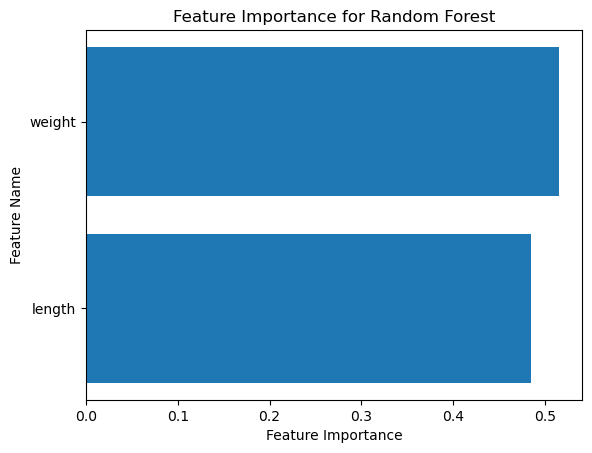

In [91]:
import matplotlib.pyplot as plt

feature_importances = grid_search.best_estimator_.feature_importances_
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance for Random Forest")
plt.show()


In [93]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Define and train LightGBM model
lgbm = lgb.LGBMClassifier(n_estimators=200, max_depth=10, learning_rate=0.05, random_state=42)
lgbm.fit(X_train, y_train)

# Evaluate
y_pred = lgbm.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"🔥 LightGBM Accuracy: {accuracy:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 2856, number of used features: 2
[LightGBM] [Info] Start training from score -2.149035
[LightGBM] [Info] Start training from score -2.287296
[LightGBM] [Info] Start training from score -2.164164
[LightGBM] [Info] Start training from score -2.236866
[LightGBM] [Info] Start training from score -2.152042
[LightGBM] [Info] Start training from score -2.185736
[LightGBM] [Info] Start training from score -2.277005
[LightGBM] [Info] Start training from score -2.140066
[LightGBM] [Info] Start training from score -2.195126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [96]:
from catboost import CatBoostClassifier

# Define and train CatBoost model
catboost = CatBoostClassifier(iterations=200, depth=10, learning_rate=0.05, verbose=50, random_state=42)
catboost.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=10, verbose=False)

# Evaluate
y_pred = catboost.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"🔥 CatBoost Accuracy: {accuracy:.4f}")


🔥 CatBoost Accuracy: 0.9314


In [95]:
from sklearn.ensemble import ExtraTreesClassifier

# Define and train ExtraTrees model
extratrees = ExtraTreesClassifier(n_estimators=200, max_depth=10, random_state=42)
extratrees.fit(X_train, y_train)

# Evaluate
y_pred = extratrees.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"🔥 ExtraTrees Accuracy: {accuracy:.4f}")


🔥 ExtraTrees Accuracy: 0.9248
